imports

In [1]:
import dataLoader3
from configParser import ConfigParser

params

In [2]:
import os

# defining global variables
experimentName = "test_22987_suffix100_nopatience"

params = ConfigParser(experimentName).read()
print(params)

experimentName = os.path.join(experimentName, "random-trial")
import TrialStatistics
ts = TrialStatistics.TrialStatistics(experimentName)

{'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': 100, 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 1000, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}


Create dataset

In [3]:
datasetManager = dataLoader3.datasetManager(experimentName, True)
datasetManager.updateParams(params)
dataset = datasetManager.getDataset()
speciesList = dataset.getSpeciesList()
numberOfSpecies = len(speciesList)
print("Number of species = ", numberOfSpecies)

Loading dataset...


100% (3800 of 3800) |####################| Elapsed Time: 0:00:56 Time:  0:00:56


Loading saved dataset structure...
                           scientificName     Genus         Family
fileName                                                          
INHS_FISH_59772.jpg     Lepomis cyanellus   Lepomis  Centrarchidae
INHS_FISH_30228.jpg     Lepomis cyanellus   Lepomis  Centrarchidae
INHS_FISH_18781.jpg   Lepomis macrochirus   Lepomis  Centrarchidae
INHS_FISH_50353.jpg   Lepomis macrochirus   Lepomis  Centrarchidae
INHS_FISH_65408.jpg       Lepomis humilis   Lepomis  Centrarchidae
...                                   ...       ...            ...
INHS_FISH_58292.jpg      Gambusia affinis  Gambusia    Poeciliidae
INHS_FISH_101194.jpg     Gambusia affinis  Gambusia    Poeciliidae
INHS_FISH_47832.jpg      Gambusia affinis  Gambusia    Poeciliidae
INHS_FISH_26493.jpg      Gambusia affinis  Gambusia    Poeciliidae
INHS_FISH_78661.jpg      Gambusia affinis  Gambusia    Poeciliidae

[3800 rows x 3 columns]
Number of species =  38


Get Random scores

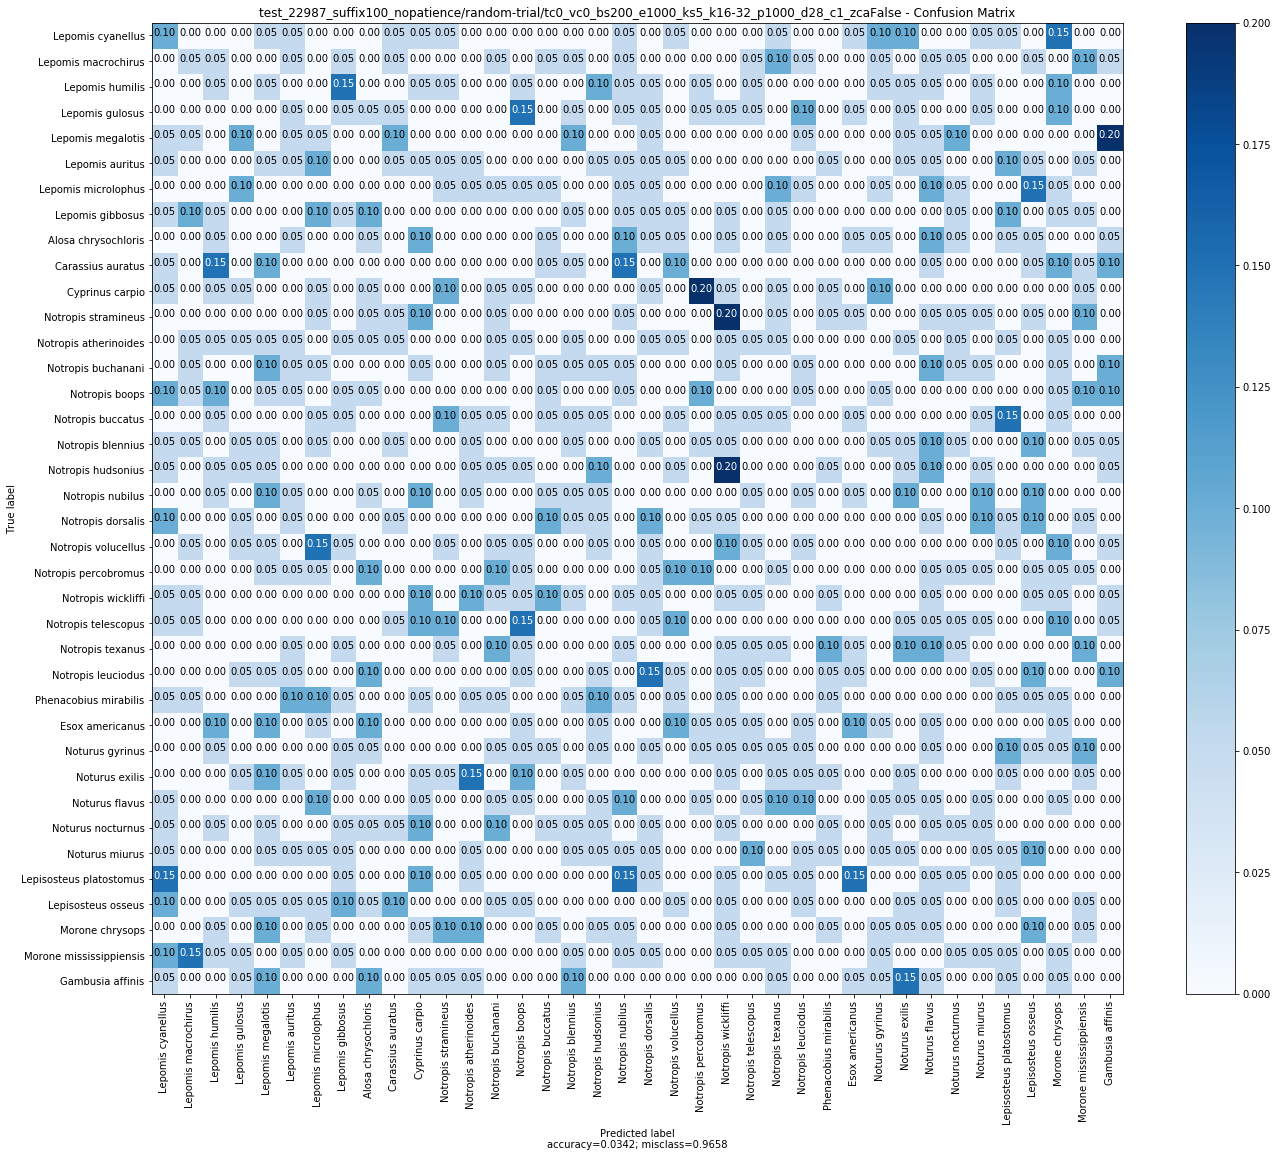

Macro f1: 0.03471596001721829
Weighted macro f1: 0.03471596001721829
Micro f1: 0.034210526315789476


In [11]:
import torch
Use_dataLoader = 3
if Use_dataLoader == 3:
    import dataLoader3 as dataLoader
elif Use_dataLoader == 2:
    import dataLoader2 as dataLoader
else:
    import dataLoader 

train_loader, validation_loader, test_loader = dataLoader.getLoadersFromDataset(dataset, params, experimentName)
lbllist=torch.zeros(0)
predlist=torch.zeros(0)
with torch.no_grad():
    for batch in test_loader:
        classes = batch["class"]
        lbllist=torch.cat([lbllist,classes.float().view(-1)])
        predlist=torch.cat([predlist, torch.FloatTensor(classes.size()[0]).random_(0, numberOfSpecies)])
        
ts.addTrialPredictions(params, predlist, lbllist, numberOfSpecies)
conf_mat = ts.printTrialConfusionMatrix(params, speciesList, True)

from sklearn.metrics import f1_score
print("Macro f1:", f1_score(lbllist.cpu(), predlist.cpu(), average='macro'))
print("Weighted macro f1:", f1_score(lbllist.cpu(), predlist.cpu(), average='weighted'))
print("Micro f1:", f1_score(lbllist.cpu(), predlist.cpu(), average='micro'))